<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/decision_tree1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_predict

In [15]:
# df
link = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(link)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [16]:
df.sample(10, random_state= 78)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
2,47,M,LOW,HIGH,10.114,drugC
118,32,F,HIGH,NORMAL,10.292,drugA
173,41,F,LOW,NORMAL,18.739,drugY
132,49,M,LOW,NORMAL,13.598,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
99,15,F,HIGH,NORMAL,16.725,drugY
79,32,F,LOW,NORMAL,10.840,drugX
89,50,F,NORMAL,NORMAL,17.211,drugY
42,50,M,NORMAL,NORMAL,15.790,drugY
50,58,F,HIGH,HIGH,19.416,drugY


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [25]:
df['Drug'].value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [18]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [19]:
# encoding
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10, random_state= 78)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
2,47,1,1,0,10.114,drugC
118,32,0,0,1,10.292,drugA
173,41,0,1,1,18.739,drugY
132,49,1,1,1,13.598,drugX
6,49,0,2,0,16.275,drugY
99,15,0,0,1,16.725,drugY
79,32,0,1,1,10.840,drugX
89,50,0,2,1,17.211,drugY
42,50,1,2,1,15.790,drugY
50,58,0,0,0,19.416,drugY


In [20]:
# extracting features and labels
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df[['Drug']].values

X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [42]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 78)

In [43]:
# model development
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
# predicting
y_pred = tree_model.predict(X_test)

In [45]:
# model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.98      0.97      0.97        40



In [52]:
# overall accuracy
print("Overall accuracy:", metrics.accuracy_score(y_test, y_pred))

Overall accuracy: 0.975


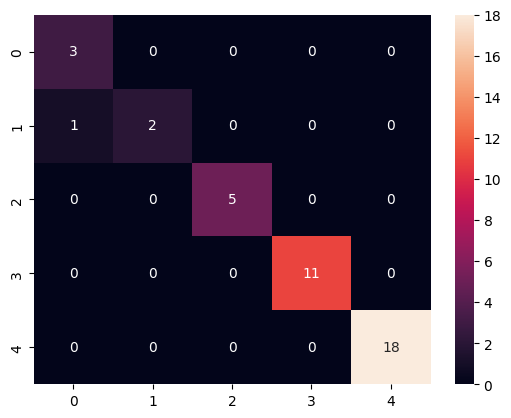

In [53]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.show()

In [54]:
# cross-validation
predict = cross_val_predict(estimator = tree_model, X= X, y= y, cv= 5)
print(classification_report(y, predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



# Vizualizing the decision tree

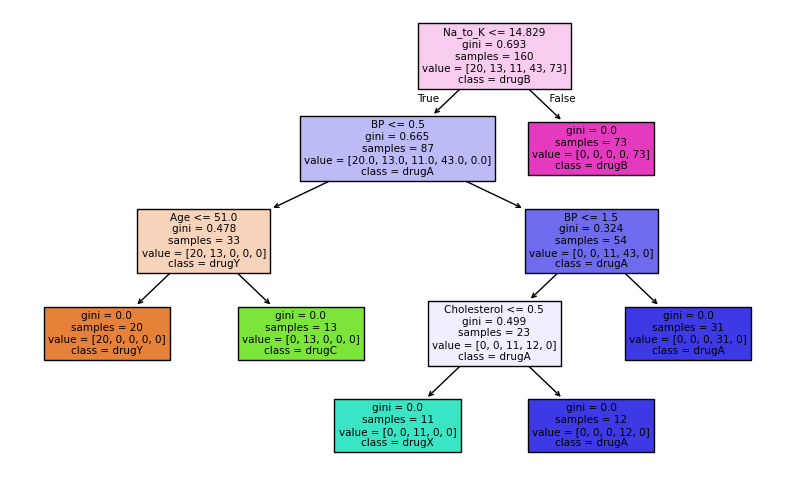

In [62]:
cols = df.drop('Drug', axis= 1).columns
classes = df['Drug'].unique()


plt.figure(figsize= (10, 6))
tree.plot_tree(tree_model, feature_names= cols, class_names= classes, filled= True)
plt.show()

# Hyperparametres

## min_impurity_decrease

Accuracy: 0.85


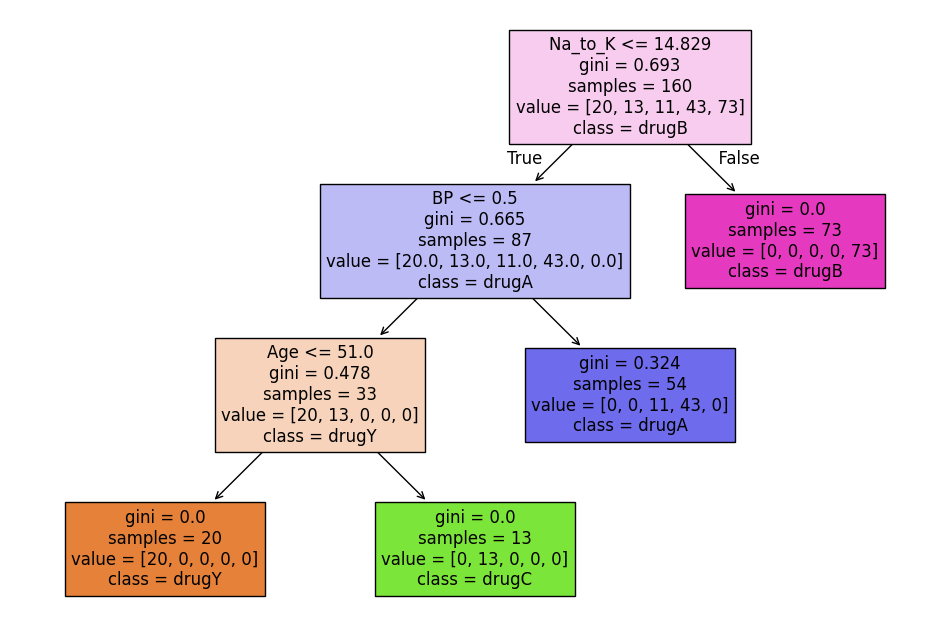

In [71]:
# model development
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.09)

# training
tree_model.fit(X_train, y_train)

# predicting
y_pred = tree_model.predict(X_test)

# model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# tree visualization
plt.figure(figsize= (12, 8))
tree.plot_tree(tree_model, feature_names= cols, class_names= classes, filled= True)
plt.show()

## max_depth

Accuracy: 0.85


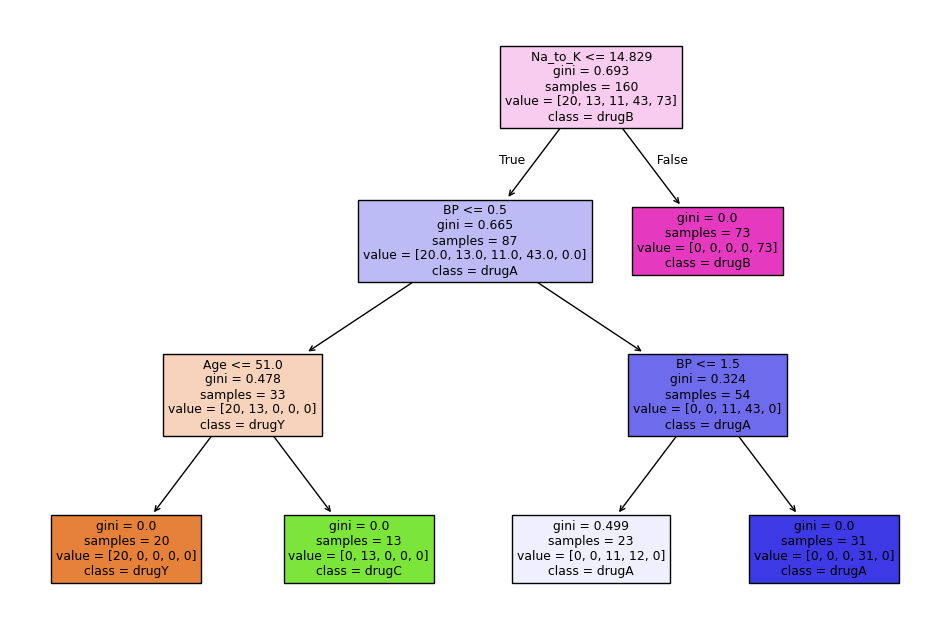

In [78]:
# model development
tree_model = DecisionTreeClassifier(min_impurity_decrease=0, max_depth= 3)

# training
tree_model.fit(X_train, y_train)

# predicting
y_pred = tree_model.predict(X_test)

# model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# tree visualization
plt.figure(figsize= (12, 8))
tree.plot_tree(tree_model, feature_names= cols, class_names= classes, filled= True)
plt.show()

## min_samples_leaf

Accuracy: 0.85


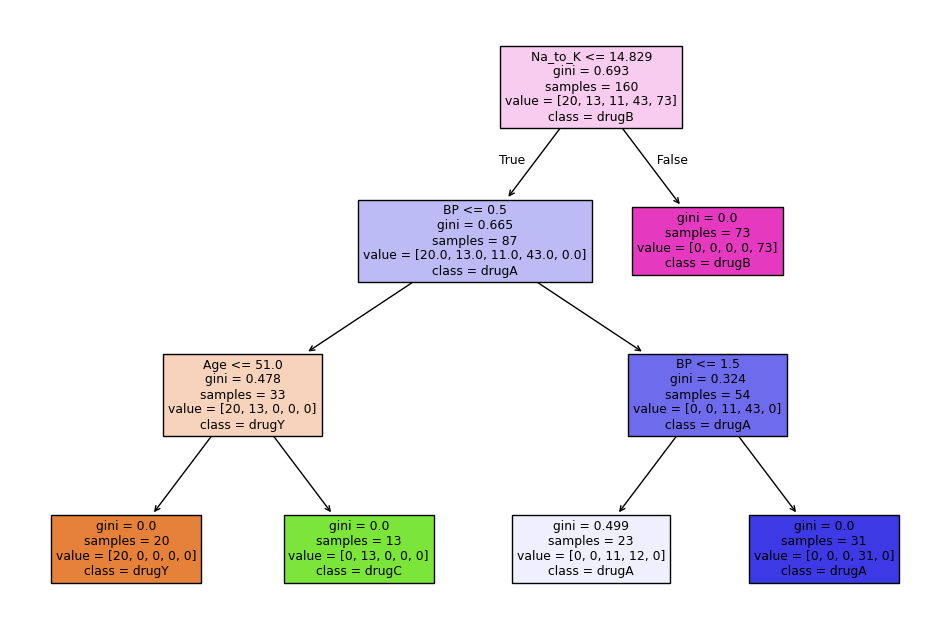

In [84]:
# model development
tree_model = DecisionTreeClassifier(min_samples_leaf= 12)

# training
tree_model.fit(X_train, y_train)

# predicting
y_pred = tree_model.predict(X_test)

# model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# tree visualization
plt.figure(figsize= (12, 8))
tree.plot_tree(tree_model, feature_names= cols, class_names= classes, filled= True)
plt.show()

# Random Forest model

In [91]:
# RF model development
RF_model = RandomForestClassifier(n_estimators= 20)
RF_model.fit(X_train, y_train)

# predicting
y_pred = RF_model.predict(X_test)

# model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         3
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.98      0.97      0.97        40



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
